In [1]:
import numpy as np
# import autograd.numpy as np
# import autograd
import scipy.stats
from scipy import optimize as opt
import pandas as pd
from matplotlib import pyplot as plt
# import seaborn as sns
# sns.set()

### Q1. Maximum Likelihood with a biased coin

Suppose that you flip an unfair (biased) coin. Each time you get "heads", you record a 1. A "tails" is a zero. Suppose that the probability `p` of a heads is fixed, but unknown. You record the following data and save it in a pandas DataFrame:

```python
df = pd.DataFrame([0,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1], columns=['heads'])
```
Use maximum likelihood to estimate the value of `p`. Note that this can be solved analytically. However, here I want you to solve the problem using numerical optimization.


Hint: Use `scipy.optimize.minimize_scalar` and make sure to include the keyword argument `method='bounded'` with the appropriate bounds. Assume that $0 < p < 1$.

**SOLUTION:**

The log-likelihood function is given by

$$
\ell = k \log(p) + (n-k) \log(1-p),
$$

where $k$ is the number of heads flipped and $n$ is the total number of coin flips.

In [2]:
df = pd.DataFrame([0,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1], columns=['heads'])

def nll(p):
#     p = theta[0]
    k = df.heads.sum()
    n = df.shape[0]
    log_lik = k * np.log(p) + (n-k) * np.log(1-p)
    return - log_lik

out = scipy.optimize.minimize_scalar(nll, bounds=[0,1], method='bounded')
out

     fun: 11.24670289237658
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 0.7499999119032107

### Q2. Plot the log-likelihood function

Plot the log-likelihood function over the values of 0.01 to .99. Make the plot fine enough so that you can see what's going on. (That is, if you use `linspace`, the number of points on the grid is up to you.)

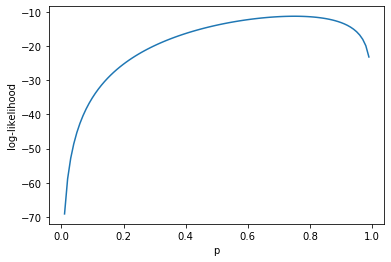

In [3]:
x = np.linspace(0.01,.99,100)
y = -nll(x)
plt.plot(x,y)
plt.xlabel('p')
plt.ylabel('log-likelihood');

### Q3. Perform a Likelihood Ratio test to test the hypothesis that the coin is fair

A fair coin is equally likely to land on heads as it is on tails. 
Test the null hypothesis that $p = .5$. Report the p-value of the test and report whether or not we should reject this hypothesis at the 5% level.

In [4]:
# p-value is smaller than 5%. Reject
LR = 2 * (-nll(out.x) + nll(.5))
p_value = 1 - scipy.stats.chi2.cdf(LR, 1)
p_value

0.02216888329055844

# Linear Regression and MLE

In this part of the exercise, we will use MLE to estimate the parameters of a simple linear regression model. We will then compare our estimates to the OLS estimates.

Assume the following linear regression model for exploring the statistical  relationship between the duration of being ill a number of possible variables that might influence that duration. Let $sick_i$ be the number of weeks that individual is sick during the year,
$$
sick_i = \beta_0 + \beta_1 age_i + \beta_2 children_i + \beta temp\_winter_i + \epsilon_i,
$$
where $\epsilon_i \sim \mathcal N(0, \sigma^2)$.
The parameters $(\beta_0, \beta_1, \beta_2, \beta_3, \sigma^2)$ are the parameters of the model that we want to estimate. The variable $age_i$ gives the age of individual $i$ at the end of the calendar year 2016. The variable $temp\_winter_i$ is the average temperature during the months of January, February, and December of 2016 for individual $i$. The data for this model are in the file `sick.txt`, which contains comma-separated values of 200 individuals for four variables $(sick_i, age_i, children_i, temp\_winter_i)$ with variable labels in the first row.


#### Q4 Estimate the parameters by maximum likelihood...

Estimate the parameters of the model $(\beta_0, \beta_1, \beta_2, \beta_3, \sigma^2)$ by maximum likelihood. Report your estimates, the value of the log-likelihood function, and the estimated variance-covariance matrix of the estimates.

Hint: Solve the linear regression equation for $\epsilon_i$ and use the information about how $\epsilon_i$ is distributed.

In [5]:
url = 'https://raw.githubusercontent.com/jmbejara/bfi-reu-2019/master/sick.txt'
df = pd.read_csv(url)
sick = df.sick.values
age = df.age.values
children = df.children.values
temp = df.avgtemp_winter.values

In [6]:
df.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [7]:

# Get a pdf of normal function
# def norm_pdf(xvals, mu=0, sigma=1):
#     pdf_vals = (1/ (sigma * np.sqrt(2 * np.pi)) * 
#                 np.exp( - np.power(xvals - mu, 2) / (2 * np.power(sigma, 2)) ))
#     return pdf_vals


def norm_pdf(xvals, mu=0, sigma=1):
    pdf_vals = (1/ (sigma * np.sqrt(2 * np.pi)) * 
                np.exp( - (xvals - mu)**2 / (2 * sigma**2) ))
    return pdf_vals


# get a log likelihood estimation
def log_lik_norm(xvals, mu=0, sigma=1):
    pdf_vals = norm_pdf(xvals, mu, sigma)
    return np.sum(np.log(pdf_vals))


# get  a log likelihood for a regression using certain parameters and 
# certain data
def neg_log_lik_reg(params, *data):
    beta_0, beta_1, beta_2, beta_3, sigma = params
    sick, age, children, temp = data
    xvals = sick - beta_0 - beta_1 * age - beta_2 * children - beta_3 * temp
    log_lik_val = log_lik_norm(xvals, mu=0, sigma=sigma)
    return -log_lik_val

beta_0_init = 0
beta_1_init  = 0
beta_2_init  = 0
beta_3_init  = 0
sigma_init = 1
params_init = np.array([beta_0_init, beta_1_init, beta_2_init, 
                        beta_3_init, sigma_init])
mle_args = sick, age, children, temp
# bounds = [(None, None)] * 4 + [(0.00001, None)]
# results = opt.minimize(neg_log_lik_reg, params_init, args=(mle_args), bounds=bounds)
results = opt.minimize(neg_log_lik_reg, params_init, args=(mle_args))

print('The parameter from beta_0 to sigma is: ', results.x )
print('MLE_Log-likelihood: ', -results.fun)

vcv_mle = np.array(results.hess_inv)
print('Variance CoVariance Matrix (MLE) = ')
print(vcv_mle)

The parameter from beta_0 to sigma is:  [ 0.25164696  0.0129334   0.40050156 -0.00999171  0.00301777]
MLE_Log-likelihood:  876.8650470218196
Variance CoVariance Matrix (MLE) = 
[[ 8.95220732e-07  1.18060705e-08 -2.02774294e-07 -2.27656435e-08
   3.36234635e-09]
 [ 1.18060705e-08  3.89770154e-09 -3.43642499e-08 -2.55579432e-09
   2.11698918e-11]
 [-2.02774294e-07 -3.43642499e-08  3.56241307e-07  2.27346736e-08
  -1.86687499e-09]
 [-2.27656435e-08 -2.55579432e-09  2.27346736e-08  2.01821875e-09
  -4.81914135e-11]
 [ 3.36234635e-09  2.11698918e-11 -1.86687499e-09 -4.81914135e-11
   2.31587509e-08]]


C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\Users\Jeremy\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\Jeremy\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [8]:
import statsmodels.stats.moment_helpers
corr_matrix, std_error = statsmodels.stats.moment_helpers.cov2corr(results.hess_inv, return_std=True)
corr_matrix

array([[ 1.        ,  0.19986466, -0.35906717, -0.53558789,  0.02335177],
       [ 0.19986466,  1.        , -0.9222113 , -0.9112499 ,  0.00222821],
       [-0.35906717, -0.9222113 ,  1.        ,  0.84787624, -0.02055349],
       [-0.53558789, -0.9112499 ,  0.84787624,  1.        , -0.00704901],
       [ 0.02335177,  0.00222821, -0.02055349, -0.00704901,  1.        ]])

In [9]:
std_error

array([9.46161050e-04, 6.24315749e-05, 5.96859537e-04, 4.49245895e-05,
       1.52179995e-04])

#### Q5. Estimate the parameters using OLS

Use the `statsmodels` package to estimate the parameters using OLS. Use the formula API of stats models. Do these estimate match the estimates from MLE?

Hint:

```python
import statsmodels.formula.api as smf
results_ols = smf.ols( ... YOUR_CODE_HERE ... ).fit()
YOUR_CODE_HERE
```

Also, in order to estimate the standard deviation of the error, you can use
`results_ols.resid.std()`.

In [10]:
import statsmodels.formula.api as smf

In [11]:
results_ols = smf.ols('sick ~ age + children + avgtemp_winter', data=df).fit()

In [12]:
results_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sick   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.815e+06
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:50:25   Log-Likelihood:                 876.87
No. Observations:                 200   AIC:                            -1746.
Df Residuals:                     196   BIC:                            -1733.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2516      0.001    254.032      0.000       0.250       0.254
age                0.0129   6.49e-05    199.257      0.000       0.013       0.013
children           0.4005      0.001    643.790      0.000       0.399       0.402
avgtemp_winter    -0.0100   4.51e-05   -221.388      0.000      -0.010      -0.010
==============================================================================
Omnibus:                       24.095   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.115
Skew:                          -0.002   Prob(JB):                       0.0285
Kurtosis:                       2.076   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
results.x

array([ 0.25164696,  0.0129334 ,  0.40050156, -0.00999171,  0.00301777])

In [14]:
results_ols.resid.std()

0.0030252617773928944